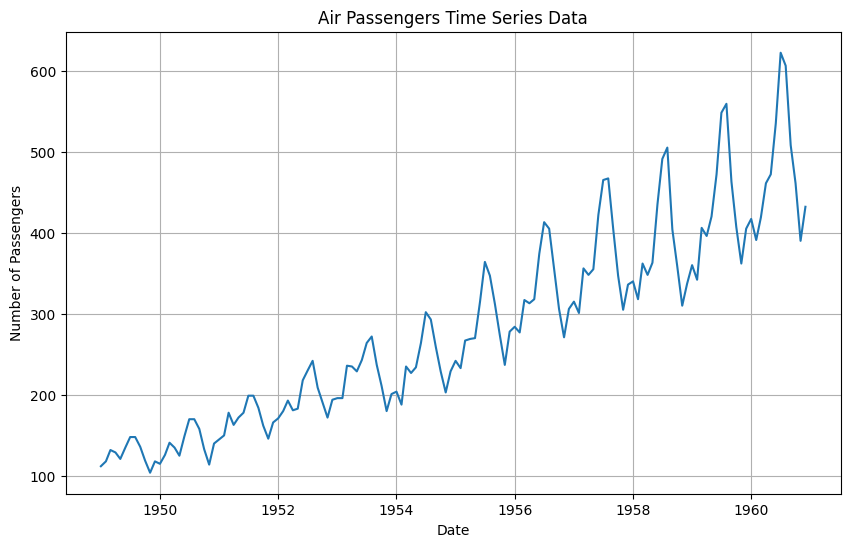

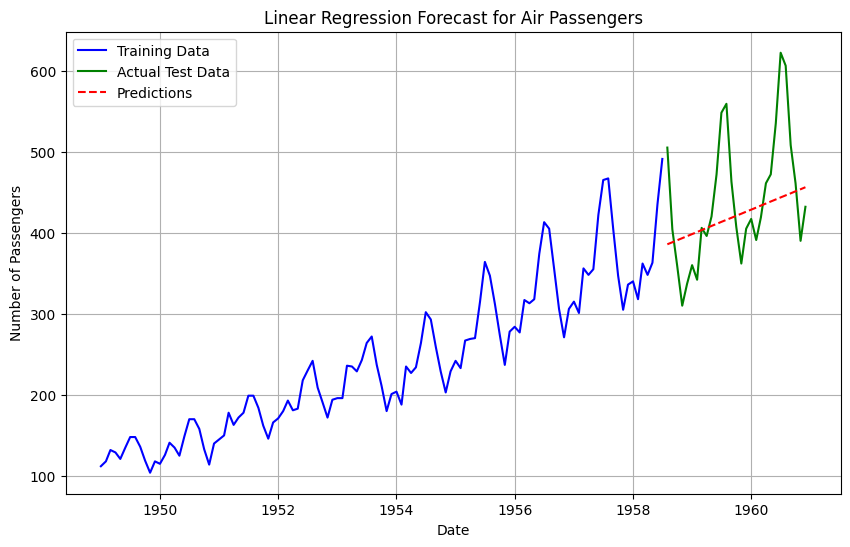

Mean Squared Error: 5447.163612684265
Root Mean Squared Error: 73.8049023621349


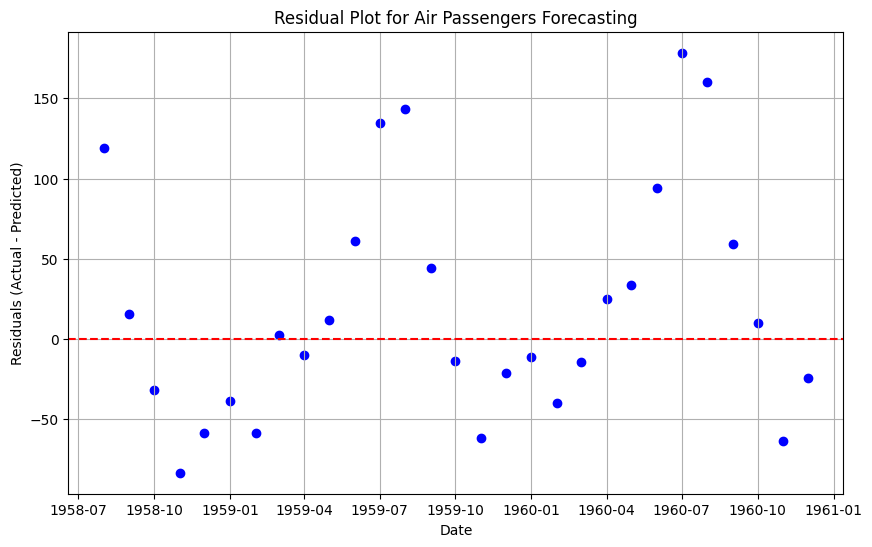

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load your Air Passenger dataset (update the file path accordingly)
df = pd.read_csv('/content/airline-passengers.csv')  # Replace with your dataset file path

# Convert 'Month' column to datetime type if it exists
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')  # Adjust if the date format is different

# Visualize the original time series
plt.figure(figsize=(10, 6))
plt.plot(df['Month'], df['Passengers'])
plt.title('Air Passengers Time Series Data')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.grid(True)
plt.show()

# Feature preparation for Linear Regression
df['Time'] = np.arange(len(df))  # Create a 'Time' column with sequential time steps

# Split the data into training and test sets
X = df[['Time']]  # Feature: Time (index)
y = df['Passengers']  # Target: Passengers (number of passengers)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Visualize the predictions vs the actual values
plt.figure(figsize=(10, 6))
plt.plot(df['Month'][:len(X_train)], y_train, label='Training Data', color='blue')
plt.plot(df['Month'][len(X_train):], y_test, label='Actual Test Data', color='green')
plt.plot(df['Month'][len(X_train):], y_pred, label='Predictions', color='red', linestyle='--')
plt.title('Linear Regression Forecast for Air Passengers')
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

# Residual Plot
residuals = y_test - y_pred  # Calculate residuals (actual - predicted)

plt.figure(figsize=(10, 6))
plt.scatter(df['Month'][len(X_train):], residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot for Air Passengers Forecasting')
plt.xlabel('Date')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()
